## Importing the Dependencies

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Reading the data

In [21]:
data = pd.read_csv('/kaggle/input/titanic/train.csv')

## Explore the data

In [22]:
#show the data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
#number of rows and coulmns 
data.shape

(891, 12)

In [24]:
#Information about data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [25]:
#show missing values in each coulmn
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## PreProcessing

In [26]:
#Fill the "Age" missing values with the mean of the coulmn
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [27]:
data['Age'].isnull().sum()

0

In [28]:
#drop the "cabin" coulmn
data = data.drop(['Cabin'], axis=1)

In [29]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [30]:
#Fill the "Embarked" missing values with the most comman values(Mode)
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [31]:
data['Embarked'].isnull().sum()

0

**Drop useless columns**

In [32]:
data = data.drop(columns=['PassengerId', 'Name', 'Ticket'])

In [33]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


**Encode Categorical Columns**

In [34]:
#convert the strings to numbers
data.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)

/tmp/ipykernel_33/872623587.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)


In [35]:
#show data
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


**Dealing with Duplicates**

In [36]:
#duplicates values
duplicates = data.duplicated()
print("Duplicates Rows:", duplicates.sum())

Duplicates Rows: 111


In [38]:
duplicate_rows = data[data.duplicated()]

print(duplicate_rows)

     Survived  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
47          1       3    1  29.699118      0      0   7.7500         2
76          0       3    0  29.699118      0      0   7.8958         0
77          0       3    0  29.699118      0      0   8.0500         0
87          0       3    0  29.699118      0      0   8.0500         0
95          0       3    0  29.699118      0      0   8.0500         0
..        ...     ...  ...        ...    ...    ...      ...       ...
870         0       3    0  26.000000      0      0   7.8958         0
877         0       3    0  19.000000      0      0   7.8958         0
878         0       3    0  29.699118      0      0   7.8958         0
884         0       3    0  25.000000      0      0   7.0500         0
886         0       2    0  27.000000      0      0  13.0000         0

[111 rows x 8 columns]


In [39]:
data = data.drop_duplicates()

## Data Analysis

In [40]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,0.412821,2.246154,0.374359,29.797600,0.525641,0.417949,34.829108,0.347436
std,0.492657,0.854452,0.484267,13.708883,0.988046,0.838536,52.263440,0.613126
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,21.750000,0.000000,0.000000,8.050000,0.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,15.950000,0.000000
75%,1.000000,3.000000,1.000000,36.000000,1.000000,1.000000,34.375000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [41]:
data.corr()['Survived']

Survived    1.000000
Pclass     -0.336244
Sex         0.513615
Age        -0.079192
SibSp      -0.037597
Parch       0.069669
Fare        0.246669
Embarked    0.077030
Name: Survived, dtype: float64

In [42]:
data['Survived'].value_counts()

Survived
0    458
1    322
Name: count, dtype: int64

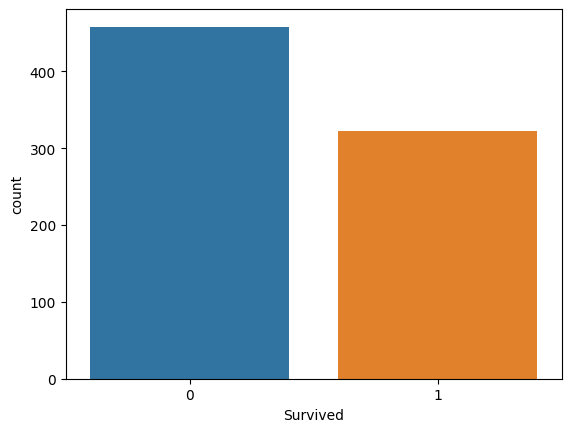

In [43]:
sns.countplot(x='Survived', data=data)
plt.show()

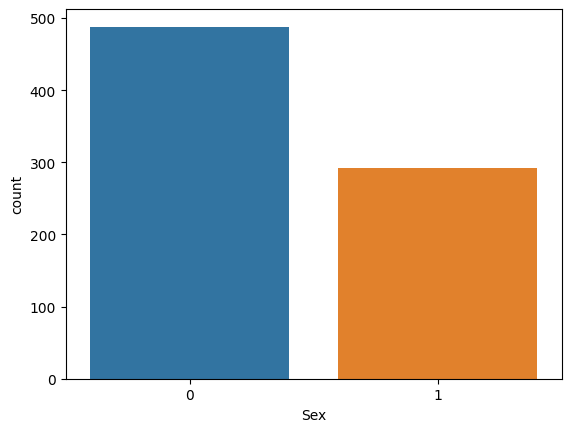

In [44]:
sns.countplot(x='Sex', data=data)
plt.show()

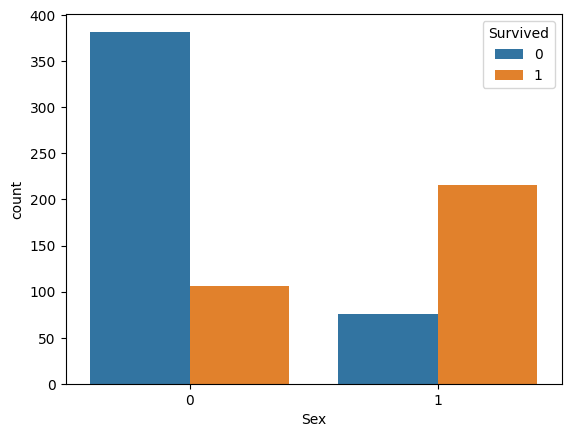

In [45]:
sns.countplot(x='Sex', hue='Survived', data=data)
plt.show()

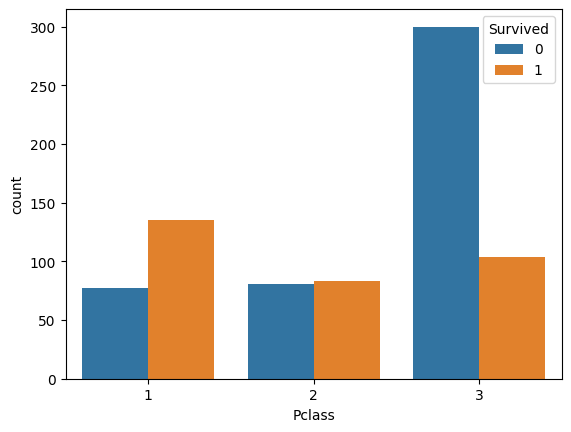

In [46]:
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.show()

## Model Building

**Separating features & Target**

In [47]:
X = data.drop(columns=['Survived'], axis=1)
y = data['Survived']

**Splitting the data into training data & Testing data**

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model Training**

In [49]:
model = LogisticRegression()
model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Model Evaluation

In [50]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [51]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7884615384615384


In [55]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[76 15]
 [18 47]]


In [56]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        91
           1       0.76      0.72      0.74        65

    accuracy                           0.79       156
   macro avg       0.78      0.78      0.78       156
weighted avg       0.79      0.79      0.79       156



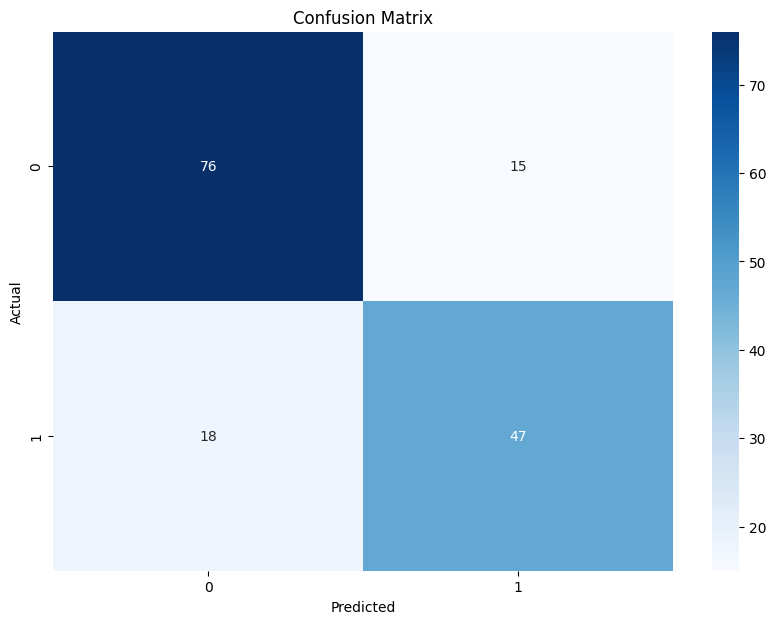

In [57]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()